### movieデータを使ってsentiment分析をする（言語解析）
#### ■ データ参照元
https://filmarks.com/movies/27394

#### ■ ジャンル
- アクション, SF

#### ■ インプットデータのフォーマットについて
- createtime
    - レビューがWeb上に登録された時間
- score
    - ユーザーが設定したレビュー点数(0-5の整数評価ではなく、少数第一まで入力が可能)
- reaction_num
    - このレビューに対し、他のユーザーがいいねと思った際にreactionする。そのいいね数
- review
    - この映画に対してのレビュー内容
    
#### ■ 実施したいこと
- これらのデータを使って、簡単に分析を行いたい
- これらのデータを使って、この映画に対しての評判分析器を作りたい（スコアで出力したい）

In [2]:
import pandas as pd

#データの読み込み（tsvファイルなので、タブ区切り）
df = pd.read_csv('filmarks_spacewar.tsv', delimiter='\t', header=None, names=['create_time', 'score', 'reaction_num','review'])

In [3]:
df.head()

,create_time,score,reaction_num,review
0,2021/03/14 21:58,4.0,11,酷評されてるほど嫌いじゃない。エイリアンそのものの怖さも勿論だが、未曾有の危機に翻弄される人...
1,2021/03/13 14:53,3.2,1,女の子の悲鳴がすごく印象に残ってる。強大な敵を前にして、悪かった関係が良好になる映画はよくあ...
2,2021/03/12 16:55,4.7,4,優れた映画は見る時代によっても印象を変えるし、自分の年齢に応じても印象が変わる。大阪ではトラ...
3,2021/03/12 14:26,-,0,2021/03/12トムクルーズの顔がいい以外は微妙な映画だったな、、
4,2021/03/08 19:13,3.9,4,超超王道のエイリアン侵略系SF映画👽安定の面白さインデペンデンスデイとはまた違う、立ち向かう...


In [4]:
!pip install seaborn

     |████████████████████████████████| 286kB 24.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# ヒストグラムでscoreを可視化してみる、socreには"-"が含まれるので一旦0と置き換え
import seaborn as sns
sns.distplot(df['score'].replace("-",0))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [6]:
# 評点が低いデータを確認してみる
df[df['score'] == "1.0"]

,create_time,score,reaction_num,review
189,2020/09/27 10:42,1.0,0,時間をかけて見る程映画ではない。かっこいいトムクルーズを想像してたけどヘタレなパパ役スピルバ...
191,2020/09/22 19:56,1.0,0,内容無いのにキャストとお金がかかっている映画。最後まで見たが個人的にはめちゃくちゃつまらん。...
212,2020/08/23 18:40,1.0,0,息子は何がしたかった？娘は叫び声がうるさすぎる（笑）｢日本人にも倒せたんだ、それなら自分たち...
289,2020/07/20 03:53,1.0,0,昔見た記憶が最高に面白くない記憶だったので改めて見てみたら。最高に面白くなかった、、、、、
304,2020/06/29 22:28,1.0,0,無敵だった宇宙人が最後あっけなく死んでいったとこがおもしろかったw
471,2020/04/29 22:03,1.0,0,トムクルーズ史上最悪のクソ映画ですね。BSでやっていたので流し観しましたが、映画館であれを観...
565,2020/03/11 01:48,1.0,1,本来なら好きであるはずのタイプの映画なのに…スコアが 1.0以下はつけれません😅0.8くらい...
594,2020/02/10 09:38,1.0,0,宇宙人とトムがワンマンアーミーするのが見たい訳で誰も宇宙人に迫害された人間同士の生き残りレー...
627,2020/01/15 16:08,1.0,1,ダコタファニングの金切り声と、最後の納得のいかない説明文しか印象に残らなかった…
909,2019/04/14 22:57,1.0,0,スコアマイナスってないのか。家族愛とかもういいかな。トムはかっこいい方がいい。


### まずはこの生データを見て考察してみてください（10分）
- ぜひデータサイエンティスト(DS)の立場に立ってみてください。
- もしかするとDSは顧客と直接かかわる機会はほぼないかもしれません。また、PMは忙しすぎてデータをみている暇もないかもしれません
- そうなったときに、これまでの講座で学んだ観点を思い出してデータに対しての考察を記載してみましょう。
- 例えば、欠損の観点、スコアの観点、このデータ特有の観点
- コードを追加で打ってもらって全然かまいません

### 回答イメージ（文字色を指定している行を削除すれば、表示可）
<span style="color: white; ">
- レビューのスコア分布としてはバラけてはいるが、やはり評点の低いレビューの総数は少ないかもしれない。追加が必要かもしれない。  　　
- 評点が"-"のコメントについては、対象外としてしまってもよいかもしれない（このあたりの使い方は確認したほうが良いかも）　　  
- Web系のサービスとなるため、絵文字の利用が結構みられる。このあたりはデータのクリーニングが必要  
- データを見る限り欠損対応等は不要な認識  
- 固有名詞（俳優や監督など）が含まれるがこれらが辞書として対応しているか  
- いいねが多いコメントについては、傾斜をつけることも考えられる（ユーザー自体の情報なども取得可能か確認）  
- ジャンルに対してのコメントの意味合いも考える必要がありそう。例えば、この映画のジャンルはSFやアクションであるが、「笑った」というレビューはマイナスの要素として取ることも多そうである。（コメディではないので）  
- 上記の観点は深層学習を使ったり（言葉を時系列として学習したり）、言葉の係り受けをジャンルで考えることで正確に解決できそうであるがまずは単純に精度を見てみるのが良い  
- ストップワード（卑猥な言葉や暴力的な内容）や全く関係ないレビューは運用側でメンテナンスされているかもしれない（確認必要）など  
</span> 

### GCP(Google Cloud Platform)のAPIを使って、簡易に評判をとってみる
- 自然言語処理APIを使ってみる  
https://cloud.google.com/natural-language?hl=ja
- 感情分析を呼び出して結果を見てみよう  
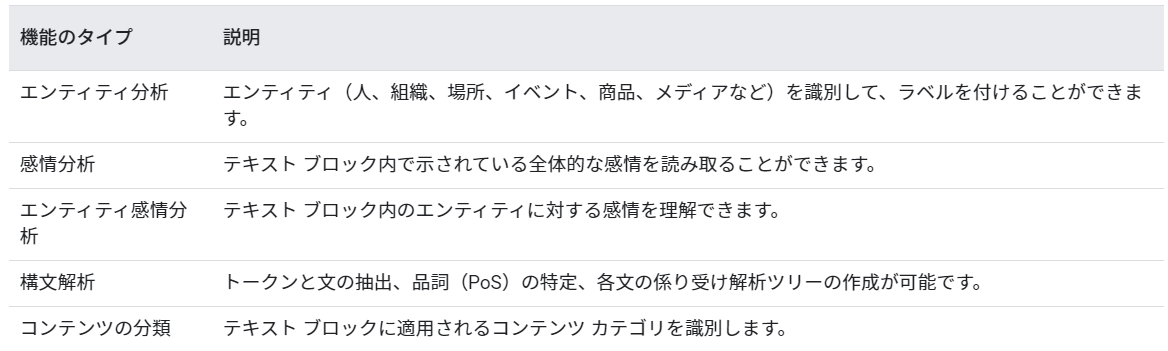

In [7]:
!pip install --upgrade google-cloud-language

     |████████████████████████████████| 153kB 12.1MB/s eta 0:00:01
     |████████████████████████████████| 51kB 29.3MB/s eta 0:00:01
     |████████████████████████████████| 102kB 13.7MB/s ta 0:00:01
     |████████████████████████████████| 512kB 28.9MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 48.5MB/s eta 0:00:01
     |████████████████████████████████| 40kB 2.1MB/s eta 0:00:011
     |████████████████████████████████| 143kB 47.6MB/s eta 0:00:01
     |████████████████████████████████| 204kB 67.7MB/s eta 0:00:01
     |████████████████████████████████| 4.0MB 54.6MB/s eta 0:00:01
     |████████████████████████████████| 645kB 52.1MB/s eta 0:00:01
     |████████████████████████████████| 163kB 61.4MB/s eta 0:00:01
     |████████████████████████████████| 81kB 32.2MB/s eta 0:00:01
ERROR: chainer 6.4.0 has requirement protobuf<3.8.0rc1,>=3.0.0, but you'll have protobuf 3.15.6 which is incompatible.
ERROR: chainer 6.4.0 has requirement typing-extensions<=3.6.6, but you'll have ty

In [8]:
# Jsonファイル（APIのキーとなる）の設定
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="____ここにJsonファイルの場所を入力する_____"

In [9]:
from google.cloud import language_v1

# クライアントの定義
client = language_v1.LanguageServiceClient()

# 試しにcallしてみる
text = u"Hello, world!"
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

Text: Hello, world!
Sentiment: 0.6000000238418579, 0.6000000238418579


In [10]:
#サンプルのレビュー
df["review"][0]

'酷評されてるほど嫌いじゃない。エイリアンそのものの怖さも勿論だが、未曾有の危機に翻弄される人々の心理的な恐怖が凄く伝わってくる。トムクルーズが変にカッコつけず、ただのオッサンとしてズル賢く奔走する姿がナイス👍'

In [11]:
# このレビューのスコアは 4.0 / 5.0
text = df["review"][0]
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

Text: 酷評されてるほど嫌いじゃない。エイリアンそのものの怖さも勿論だが、未曾有の危機に翻弄される人々の心理的な恐怖が凄く伝わってくる。トムクルーズが変にカッコつけず、ただのオッサンとしてズル賢く奔走する姿がナイス👍
Sentiment: 0.10000000149011612, 1.2999999523162842


#### 各数値の内容はこちら
- magnitudeは強度をします指標、 0～∞ の数値で表現し、negaやposi関係ない
- scoreは単純にsentiment（感情）を表す指標 -1がnegaで1がposi  
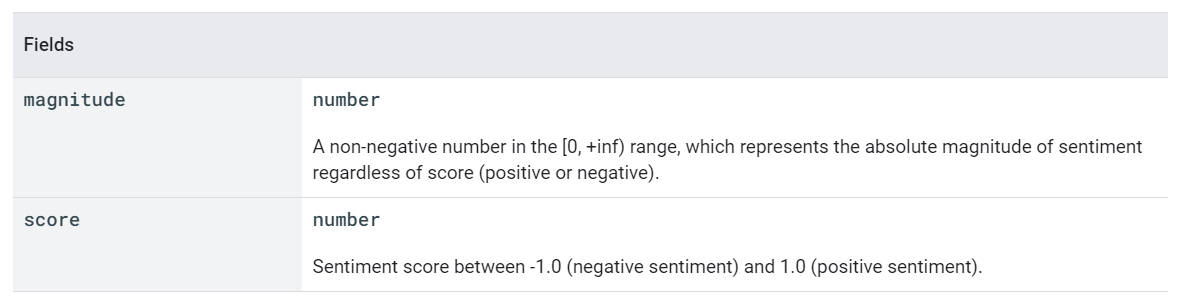

In [12]:
# もう一つ見てみましょう
# このレビューのスコアは 3.5 / 5.0
text = df["review"][100]
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

Text: 多分人生で初めて見たエイリアン系の映画。赤い血管みたいなのがキモすぎ。
Sentiment: -0.30000001192092896, 0.8999999761581421


In [13]:
# 極性の強いレビューも確認してみます
# このレビューのスコアは 1.0 / 5.0
text = df["review"][289]
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

Text: 昔見た記憶が最高に面白くない記憶だったので改めて見てみたら。最高に面白くなかった、、、、、
Sentiment: -0.4000000059604645, 0.8999999761581421


In [14]:
# ちょっと皮肉った内容の場合は？
# このレビューのスコアは 2.6 / 5.0
text = df["review"][1052]
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

Text: 完全にやりたい事だけ撮った映画それまでの過程とか全く考えてないし高度な生命体と言いながらうーうー嘆く低脳生物何故あんな奴らがあんなもの作れたのか納得いかないこんな素人映画だれが撮ったのかと思ったらスピルバーグで笑った
Sentiment: -0.699999988079071, 0.699999988079071


### 簡易考察
- APIでは-1から+1での極性表示なので、1.0-5.0への値へマッピングする必要はある
- 精度としては、posiとnegaの感度は取れてそう。マグニチュードやいいね数などを考慮してロジックを追加するのもあり
- 少し皮肉った内容でも極性が強めのnegaで取れているので、うまく文章全体から極性を理解していそう（このままでも十分使えるかも）

### ここからさらに分析と学習に入っていく。まず形態素解析をしてみる

In [4]:
# 共通の講義でも説明したが、形態素解析として文章を形態素（≠単語の場合もある）に分割する
#　利用の目的としては、主に形態素に付与されている品詞を使って、必要な情報でのみで学習することを目的とする
# 今回はsudachiを使う（他にもMeCabやJanome, GINZA, Juman++など、種類があるので確認してみること）
# 今回の選択理由はinstallがとても簡単だから
!pip install sudachipy

     |████████████████████████████████| 71kB 14.6MB/s eta 0:00:01
     |████████████████████████████████| 481kB 33.6MB/s eta 0:00:01
  Created wheel for sudachipy: filename=SudachiPy-0.5.1-cp36-cp36m-linux_x86_64.whl size=887854 sha256=e1b7d9c776993bf3a4b07239df39e034a6e5f672c867e73e4cee8a3fd3d5a82a
  Stored in directory: /root/.cache/pip/wheels/a5/fb/54/82b45dd3d48476dfe6d055da5dee9d5fa1c1941368f9568e90
Successfully built sudachipy
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# 辞書のisntall
!pip install sudachidict_core

  Created wheel for sudachidict-core: filename=SudachiDict_core-20201223.post1-cp36-none-any.whl size=71405682 sha256=26fbc9bffef10594a29729ba44173de3f060e6767babb1b2c28a18a27f68bb66
  Stored in directory: /root/.cache/pip/wheels/d4/f8/ff/f9465f9313f865acb1c5500f4d538c470b163b674e184a90d7
Successfully built sudachidict-core
You should consider upgrading via the 'pip install --upgrade pip' command.


### sudachiのReadme
- https://github.com/WorksApplications/Sudachi/blob/develop/README.md#sudachi-%E6%97%A5%E6%9C%AC%E8%AA%9Ereadme
- https://github.com/WorksApplications/SudachiPy

In [6]:
# 確認してみよう
# モードによって、結果が異なる
from sudachipy import tokenizer
from sudachipy import dictionary

tokenizer_obj = dictionary.Dictionary().create()

mode = tokenizer.Tokenizer.SplitMode.C
[m.surface() for m in tokenizer_obj.tokenize("国家公務員", mode)]
# => ['国家公務員']

['国家公務員']

In [7]:
mode = tokenizer.Tokenizer.SplitMode.B
[m.surface() for m in tokenizer_obj.tokenize("国家公務員", mode)]
# => ['国家', '公務員']

['国家', '公務員']

In [8]:
mode = tokenizer.Tokenizer.SplitMode.A
[m.surface() for m in tokenizer_obj.tokenize("国家公務員", mode)]
# => ['国家', '公務', '員']

['国家', '公務', '員']

In [9]:
# 今回のデータにスティーブンスピルバーグは2単語（もちろん辞書に登録されてないであろう）
mode = tokenizer.Tokenizer.SplitMode.C
[m.surface() for m in tokenizer_obj.tokenize("スティーブンスピルバーグ", mode)]

['スティーブン', 'スピルバーグ']

In [10]:
# 一般的な人名として、固有名詞として認識されている
[m.part_of_speech() for m in tokenizer_obj.tokenize("スティーブンスピルバーグ", mode)]

[['名詞', '固有名詞', '人名', '一般', '*', '*'], ['名詞', '固有名詞', '人名', '一般', '*', '*']]

In [11]:
# 例えば、下記は普通名詞として認識されているが、世間ではマツコデラックスが人名（固有名詞）として認識されている
# これらを固有名詞として認識したい場合は、使用している辞書のメンテンスを個人が行うか
# すでにこれらがメンテナンスされている辞書を利用する必要がある（NEologdなどは辞書のメンテンスが盛ん）
# このような観点からもツールを選ぶ必要がある
[m.part_of_speech() for m in tokenizer_obj.tokenize("マツコデラックス", mode)]

[['名詞', '普通名詞', '一般', '*', '*', '*']]

In [12]:
def wakati_by_sudachi(text):
    """
    分かち書き
    """
    mode = tokenizer.Tokenizer.SplitMode.C #モードCの一番長い形で分ける
    results =[m.surface() for m in tokenizer_obj.tokenize(text, mode)]
    word_list = []
    for mrph in results:
        if not (mrph == ""): #何故か分かち書きの結果として空白データ（''）ができたための省く処理
            seikika = tokenizer_obj.tokenize(mrph,mode)[0].normalized_form() #正規化（標準化？）してなるべく言葉の揺れを無くす　e.g. 打込む → 打ち込む かつ丼 → カツ丼
            hinsi = tokenizer_obj.tokenize(seikika,mode)[0].part_of_speech()[0]
            if hinsi in  ["名詞", "動詞", "形容詞"]:  # 対象とする品詞を指定
                word = tokenizer_obj.tokenize(seikika,mode)[0].dictionary_form()
                word_list.append(word)
    return " ".join(word_list) #スペースで繋げていく

In [13]:
%%time
# 形態素解析に少し時間かかる(2~3分)
from tqdm import tqdm_notebook as tqdm
wakati_list=[]
for lines in tqdm(df["review"]):
    wakati_list.append(wakati_by_sudachi(lines))

In [14]:
#確認、絵文字が目立つので削除しましょう
wakati_list[0:10]

['酷評 嫌い 無い エイリアン 物 怖い 未曾有 危機 翻弄 人々 心理的 恐怖 凄い 伝わる 来る トムクルーズ 変 格好 つける オッサン 狡賢い 奔走 為る 姿 ナイス',
 '女の子 悲鳴 凄い 印象 残る 強大 敵 前 悪い 関係 成る 映画 良い 有る 思う 笑い 逆 強大 敵 前 悪い 関係 足 引っ張る 仕舞う 言う 見る み',
 '優れる 映画 見る 時代 印象 変える 自分 年齢 応ずる 印象 変わる 大阪 トライポッド 倒す 説 有り 吉本 菌 無い エイリアン 蛸焼き 具 適当 粗筋 知性 持つ 地球 攻略 作戦 1 ⃣ 0 ⃣ 0 ⃣ 万 年 前 監視 港湾 作業員 レイ トム クルーズ クレーン コンテナ 下ろし 居る 仲間内 頼る 存在 良い 家 帰る 家 前 車 息子 娘 降り レイ こと 無視 為る 良い 側 別れ 妻 メリー ミランダ オットー 新しい 夫 メリー 新しい 夫 子供 妊娠 おる 出産 準備 間 メリー 住む 居る 息子 ロビー ジャスティン チャット ウィン レイチェル ダコタ ファニング 二人 預かる こと 独り暮らし レイ 家 荒れ放題 室内 自動車 エンジン 部品 散乱 食材 なし メリー 心配 成る ロビー レポート 学校 管理 レイ 出来る 良い 子 言う メリー 不安 テレビ ニュース ウクライナ 停電 話題 レイ ロビー キャッチ ボール 誘う 段々 互い 意地 速度 上げ 行く レイ 投げ ボール 家 窓 割る レイ 食事 作る 無い デリバリー しろ 言う レイチェル 自然食品 頼む レイ 好み 無い 外 騒がしい レイ 出 見る 向こう 空 変 雲 ⛈、 強い 風 はためく 洗濯物 雷 ⚡ ⚡ ⚡ ⚡ 何度 落ちる ロビー レイ 車 外出 レイチェル 家 残す 街 様子 見る 行く レイ 人だかり 出来る おる 見る 地面 陥没 居る 雷 瓦礫 冷たい 音 とも 地面 罅割れ 近く 教会 倒壊 為る マシン 出現 マシン 放つ ビーム 良い 物 浴びる 人々 蒸発 仕舞う 逃げる 切る レイ 自宅 戻る ロビー レイチェル 連れ 家 出 避難 為る パニック 成る レイチェル ロビー 御 呪い 教える 途中 拾う 車 メリー 家 着く 無い 食事 支度 苦手 レイ 有る 食パン 二人 配る 

In [15]:
!pip install emoji --upgrade

     |████████████████████████████████| 133kB 15.9MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
# emojiのパッケージ辞書を使って、emojiを一層してみる
import emoji
wakati_list_ne = []
for words in wakati_list:
    wakati_list_ne.append(''.join(['' if c in emoji.UNICODE_EMOJI["en"] else c for c in words]))

In [17]:
# 一部削除しきれていないが、一旦はここまでとする
wakati_list_ne[0:10]

['酷評 嫌い 無い エイリアン 物 怖い 未曾有 危機 翻弄 人々 心理的 恐怖 凄い 伝わる 来る トムクルーズ 変 格好 つける オッサン 狡賢い 奔走 為る 姿 ナイス',
 '女の子 悲鳴 凄い 印象 残る 強大 敵 前 悪い 関係 成る 映画 良い 有る 思う 笑い 逆 強大 敵 前 悪い 関係 足 引っ張る 仕舞う 言う 見る み',
 '優れる 映画 見る 時代 印象 変える 自分 年齢 応ずる 印象 変わる 大阪 トライポッド 倒す 説 有り 吉本 菌 無い エイリアン 蛸焼き 具 適当 粗筋 知性 持つ 地球 攻略 作戦 1 ⃣ 0 ⃣ 0 ⃣ 万 年 前 監視 港湾 作業員 レイ トム クルーズ クレーン コンテナ 下ろし 居る 仲間内 頼る 存在 良い 家 帰る 家 前 車 息子 娘 降り レイ こと 無視 為る 良い 側 別れ 妻 メリー ミランダ オットー 新しい 夫 メリー 新しい 夫 子供 妊娠 おる 出産 準備 間 メリー 住む 居る 息子 ロビー ジャスティン チャット ウィン レイチェル ダコタ ファニング 二人 預かる こと 独り暮らし レイ 家 荒れ放題 室内 自動車 エンジン 部品 散乱 食材 なし メリー 心配 成る ロビー レポート 学校 管理 レイ 出来る 良い 子 言う メリー 不安 テレビ ニュース ウクライナ 停電 話題 レイ ロビー キャッチ ボール 誘う 段々 互い 意地 速度 上げ 行く レイ 投げ ボール 家 窓 割る レイ 食事 作る 無い デリバリー しろ 言う レイチェル 自然食品 頼む レイ 好み 無い 外 騒がしい レイ 出 見る 向こう 空 変 雲 、 強い 風 はためく 洗濯物 雷     何度 落ちる ロビー レイ 車 外出 レイチェル 家 残す 街 様子 見る 行く レイ 人だかり 出来る おる 見る 地面 陥没 居る 雷 瓦礫 冷たい 音 とも 地面 罅割れ 近く 教会 倒壊 為る マシン 出現 マシン 放つ ビーム 良い 物 浴びる 人々 蒸発 仕舞う 逃げる 切る レイ 自宅 戻る ロビー レイチェル 連れ 家 出 避難 為る パニック 成る レイチェル ロビー 御 呪い 教える 途中 拾う 車 メリー 家 着く 無い 食事 支度 苦手 レイ 有る 食パン 二人 配る ピーナッツ

### nlplotを使って、データの特色を確認してみる

- nlplotとは、手軽に言語データの可視化を行ってくれるライブラリ
- ビジュアルライブラリとしてはplotlyやbokehを使えば、カスタマイズされた描画も可能だが、手間をかけたくない場合などに  
https://www.takapy.work/entry/2020/05/17/192947

In [17]:
!pip install nlplot

     |████████████████████████████████| 972kB 19.1MB/s eta 0:00:01
     |████████████████████████████████| 24.2MB 59.2MB/s eta 0:00:01
     |████████████████████████████████| 286kB 46.3MB/s eta 0:00:01
     |████████████████████████████████| 13.2MB 49.5MB/s eta 0:00:01
     |████████████████████████████████| 368kB 63.9MB/s eta 0:00:01
     |████████████████████████████████| 1.7MB 37.7MB/s eta 0:00:01
     |████████████████████████████████| 122kB 64.7MB/s eta 0:00:01
     |████████████████████████████████| 471kB 48.4MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=9230c8467f3942af6c6b641e855e26501a04cdf4943e798c5c9da1034124db52
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=e2bd8645e29319ec690e852cc855acade043635855a6fd4f3be597306dad5462
  Stored in directory: /root/.cache/pip/whe

In [ ]:
#最新だと動かないのでversionをdownさせる
!pip install pyLDAvis==3.2.0

In [18]:
# Dataframeに現状の形態素結果を結合する
df["review_keitaiso"] = wakati_list_ne

In [19]:
df.head()

,create_time,score,reaction_num,review,review_keitaiso
0,2021/03/14 21:58,4.0,11,酷評されてるほど嫌いじゃない。エイリアンそのものの怖さも勿論だが、未曾有の危機に翻弄される人...,酷評 嫌い 無い エイリアン 物 怖い 未曾有 危機 翻弄 人々 心理的 恐怖 凄い 伝わる...
1,2021/03/13 14:53,3.2,1,女の子の悲鳴がすごく印象に残ってる。強大な敵を前にして、悪かった関係が良好になる映画はよくあ...,女の子 悲鳴 凄い 印象 残る 強大 敵 前 悪い 関係 成る 映画 良い 有る 思う 笑い...
2,2021/03/12 16:55,4.7,4,優れた映画は見る時代によっても印象を変えるし、自分の年齢に応じても印象が変わる。大阪ではトラ...,優れる 映画 見る 時代 印象 変える 自分 年齢 応ずる 印象 変わる 大阪 トライポッド...
3,2021/03/12 14:26,-,0,2021/03/12トムクルーズの顔がいい以外は微妙な映画だったな、、,2021 03 12 トムクルーズ 顔 良い 以外 映画
4,2021/03/08 19:13,3.9,4,超超王道のエイリアン侵略系SF映画👽安定の面白さインデペンデンスデイとはまた違う、立ち向かう...,王道 エイリアン 侵略 系 SF 映画 安定 面白い インデペンデンスデイ 違う 立ち向かう...


In [20]:
import nlplot
#事前にデータを読み込む
npt = nlplot.NLPlot(df, target_col='review_keitaiso')
npt_reaction = nlplot.NLPlot(df.query('reaction_num > 0'), target_col='review_keitaiso')

In [21]:
# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
# 今回は上位2単語をストップワードに指定
stopwords = npt.get_stopword(top_n=2, min_freq=0)

In [36]:
# 本来であれば、インタラクティブに結果の確認が可能であるが、環境の都合により
# htmlの掃き出した結果で確認(unigram)
out = npt.bar_ngram(
    title='spacewar_uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    stopwords=stopwords,
    save=True
)

100%|██████████| 2097/2097 [00:00<00:00, 59682.40it/s]


In [37]:
# htmlの掃き出した結果で確認(bigram)
out = npt.bar_ngram(
    title='spacewar_bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
    stopwords=stopwords,
    save=True
)

100%|██████████| 2097/2097 [00:00<00:00, 18020.45it/s]


#### バイグラムTop5当たりは不要でstopワードして排除して良さそう
- 宇宙 人
- トム クルーズ
- 宇宙 戦争
- ダコタ ファニング
- スピルバーグ 監督

In [41]:
# 一応reactionがついているレビューのみでも確認する
out = npt_reaction.bar_ngram(
    title='spacewar_bi-gram_reaction',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
    stopwords=stopwords,
    save=True
)

100%|██████████| 1326/1326 [00:00<00:00, 34371.47it/s]


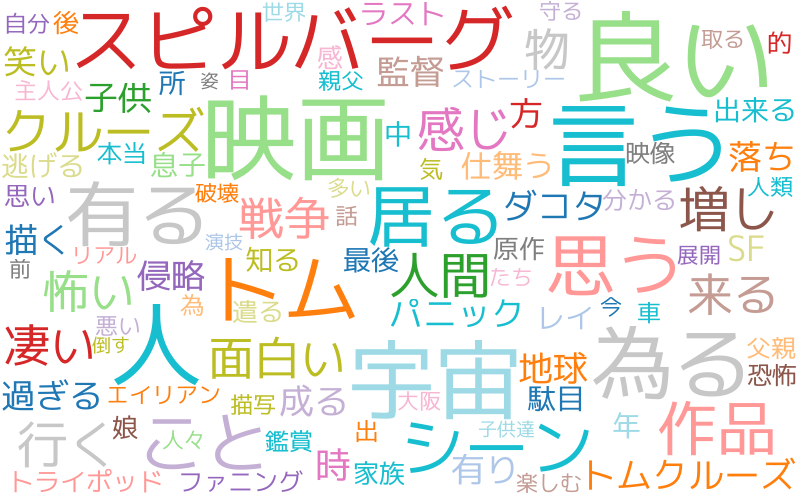

In [39]:
# ワードクラウド（正直あまり使えません）
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
)


In [ ]:
# ビルド（データ件数によっては処理に時間を要します）
npt.build_graph(stopwords=stopwords, min_edge_frequency=25)

out = npt.co_network(title='spacewar_occurrence_network',save=True)

- htmlで開くとこのようなイメージが開けるはず（下記は画像）
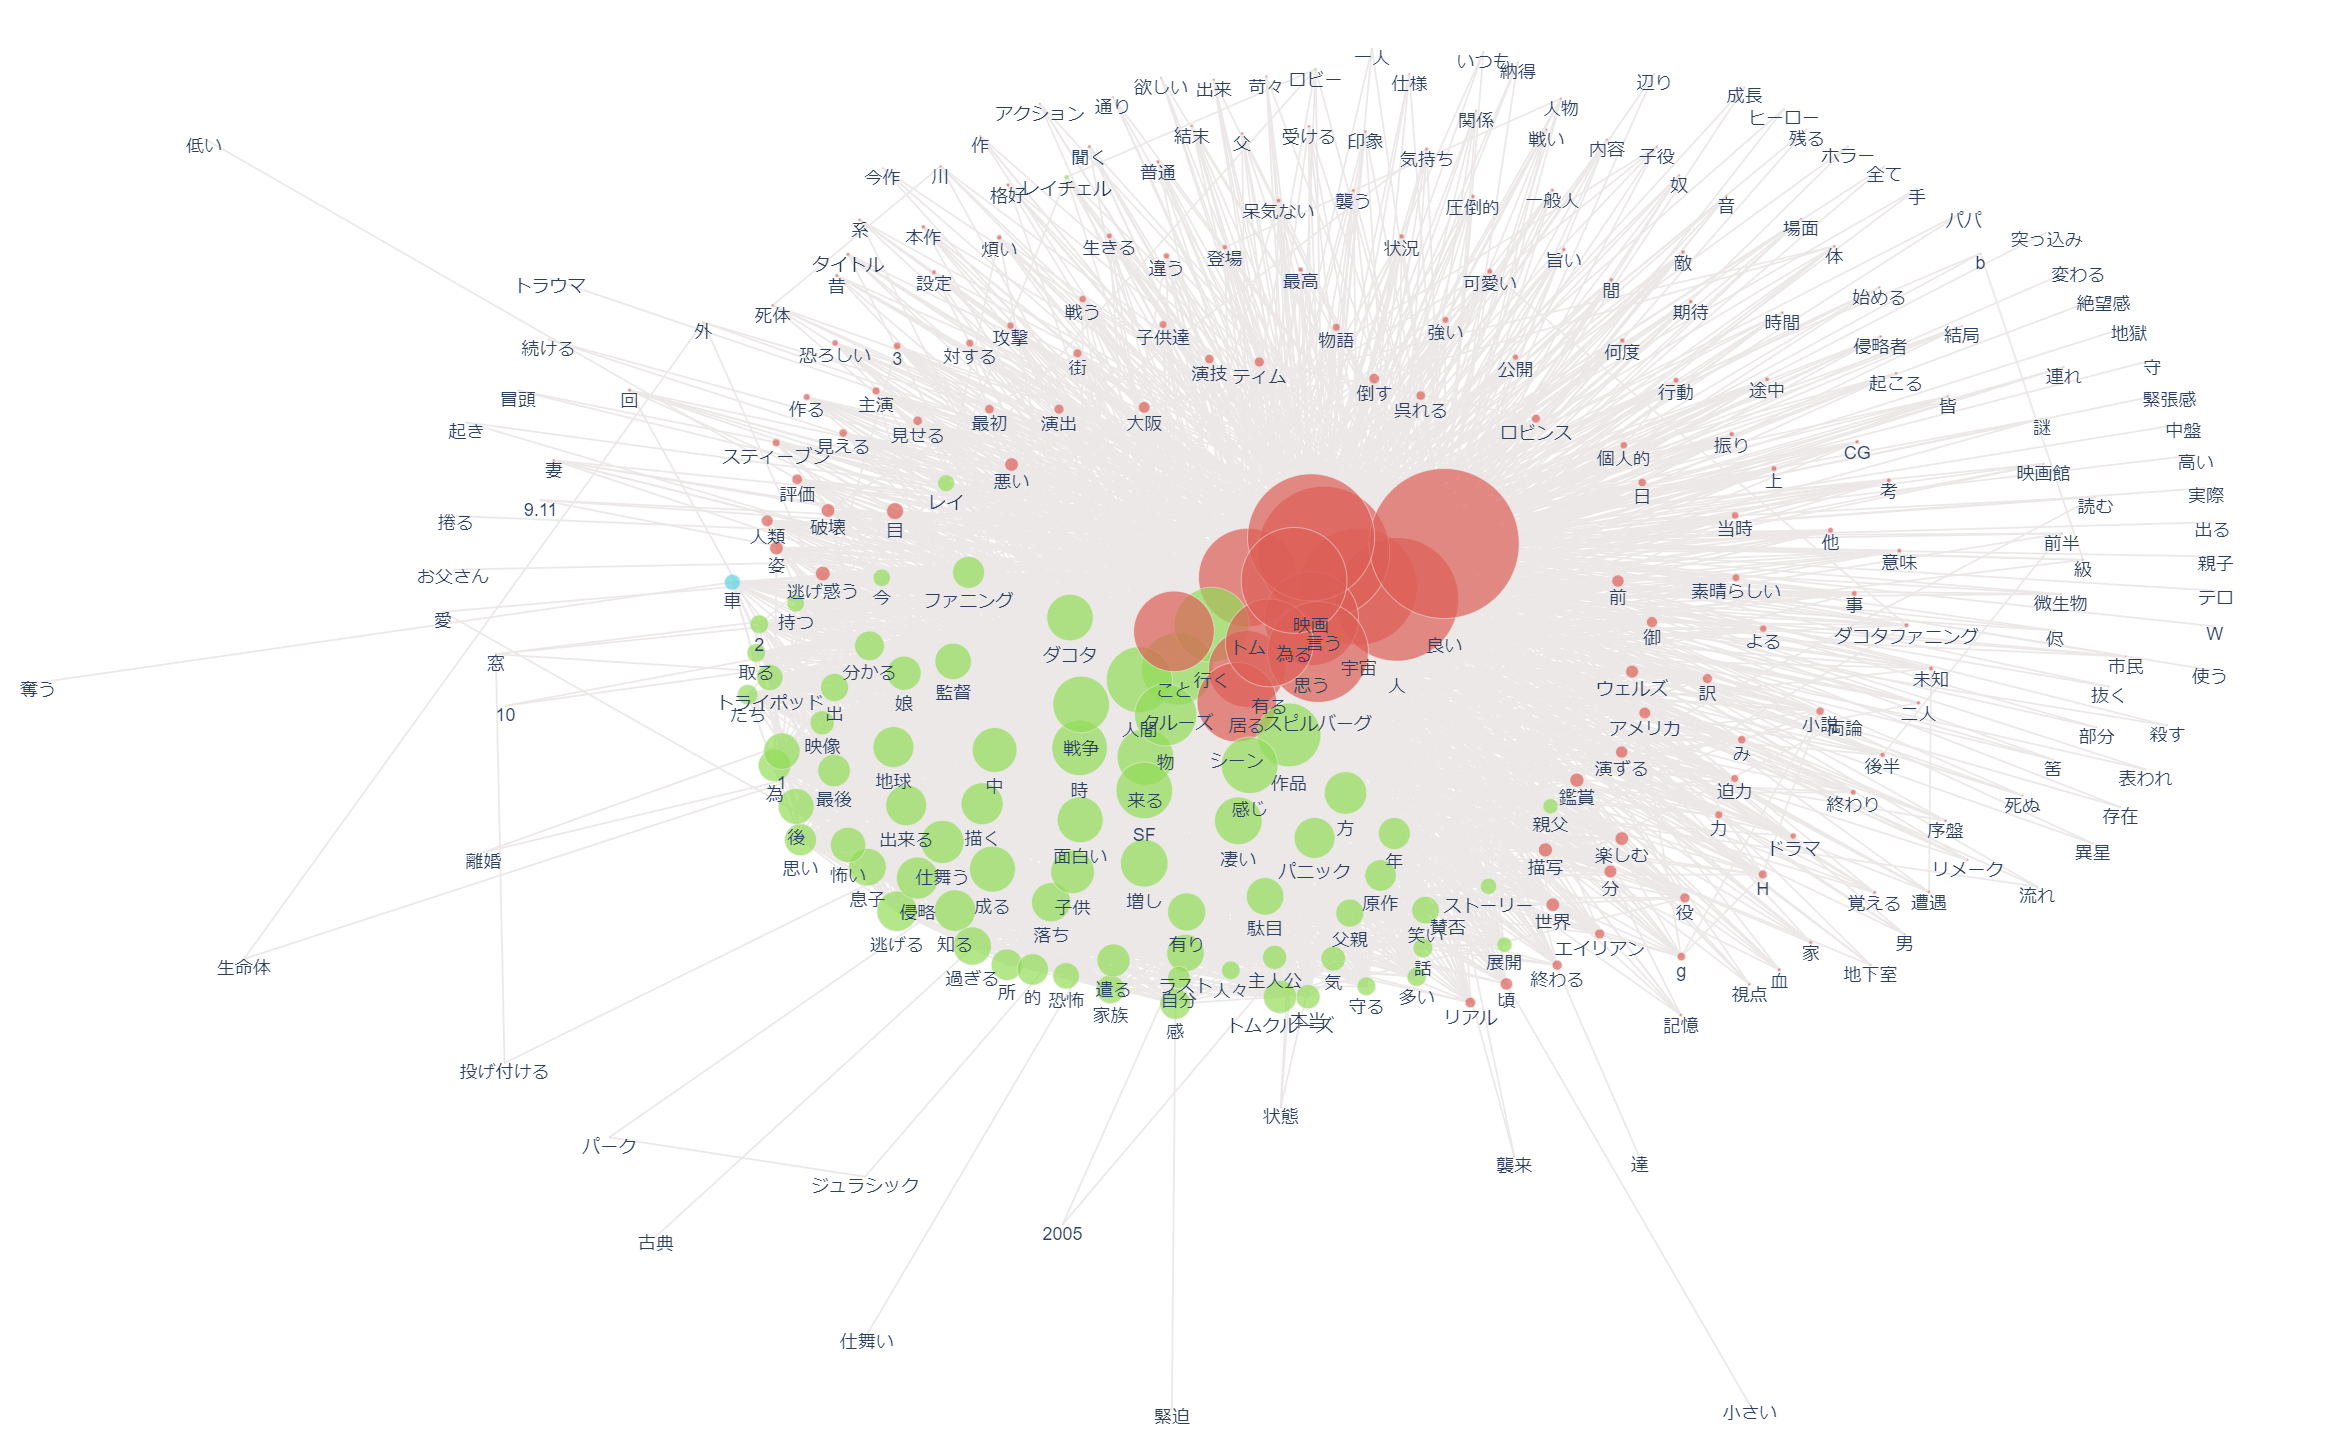

In [53]:
# サンバーストチャートでも表示
out = npt.sunburst(title='spacewar_sunburst_chart',save=True)

In [55]:
# pyLDAvis (時間がかかりすぎるので実施しない)
#import pyLDAvis
#pyLDAvis.enable_notebook()
#out = npt.ldavis(num_topics=5, passes=5)

### ここで時間を15分取るので、自分で処理を触ってみてください（数値の変更など）。
- ほかにも公開されているストップワードを使って、データを編集するなどいくつか方法はある  
http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt


In [18]:
# ユニグラムとバイグラムとして頻度が多かったwordは対象から除外処理を行う
wakati_list_nstop = []
wakati_list_nstop_spl = []
for words in wakati_list_ne:
    text = words.replace('宇宙 人 ',"").replace('トム クルーズ ',"").replace('宇宙 戦争 ',"").replace('ダコタ ファニング ',"").replace('スピルバーグ 監督 ',"").replace("トムクルーズ ", "").replace("スピルバーグ ", "")
    #Dataframeに格納できる用に格納
    wakati_list_nstop.append(text)
    #gensimで使用する用
    wakati_list_nstop_spl.append(text.split(" "))

In [19]:
# 再度 Dataframeに現状の形態素結果を結合する
df["review_keitaiso"] = wakati_list_nstop

In [20]:
df.head()

,create_time,score,reaction_num,review,review_keitaiso
0,2021/03/14 21:58,4.0,11,酷評されてるほど嫌いじゃない。エイリアンそのものの怖さも勿論だが、未曾有の危機に翻弄される人...,酷評 嫌い 無い エイリアン 物 怖い 未曾有 危機 翻弄 人々 心理的 恐怖 凄い 伝わる...
1,2021/03/13 14:53,3.2,1,女の子の悲鳴がすごく印象に残ってる。強大な敵を前にして、悪かった関係が良好になる映画はよくあ...,女の子 悲鳴 凄い 印象 残る 強大 敵 前 悪い 関係 成る 映画 良い 有る 思う 笑い...
2,2021/03/12 16:55,4.7,4,優れた映画は見る時代によっても印象を変えるし、自分の年齢に応じても印象が変わる。大阪ではトラ...,優れる 映画 見る 時代 印象 変える 自分 年齢 応ずる 印象 変わる 大阪 トライポッド...
3,2021/03/12 14:26,-,0,2021/03/12トムクルーズの顔がいい以外は微妙な映画だったな、、,2021 03 12 顔 良い 以外 映画
4,2021/03/08 19:13,3.9,4,超超王道のエイリアン侵略系SF映画👽安定の面白さインデペンデンスデイとはまた違う、立ち向かう...,王道 エイリアン 侵略 系 SF 映画 安定 面白い インデペンデンスデイ 違う 立ち向かう...


### TF-IDFを用いて、ベクトル化を行いモデルの学習を実行してみる

In [21]:
# gensimのinstall
# gensimは言語処理向けのライブラリで、w2vやベクトル化・コーパスかに利用可能
!pip install gensim

     |████████████████████████████████| 24.2MB 16.6MB/s eta 0:00:01.7MB 16.6MB/s eta 0:00:01
     |████████████████████████████████| 122kB 70.8MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-4.2.0-cp36-none-any.whl size=109633 sha256=27e63b102b32d35963a4b21b62249f44a3241498e21af37511268e180487a6bb
  Stored in directory: /root/.cache/pip/wheels/15/0f/9d/7e45b70ef6b849a97f74eb004fa9a350e7e496a6404805a8a1
Successfully built smart-open
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
# 出現ワードの辞書を作成
from gensim import corpora
dic = corpora.Dictionary(wakati_list_nstop_spl)
print(len(dic))

# 「出現頻度が10未満の単語」と「30%以上の文書で出現する単語」を排除
dic.filter_extremes(no_below = 10, no_above = 0.3)
bow_corpus = [dic.doc2bow(d) for d in wakati_list_nstop_spl]

# 辞書の保存
dic.save_as_text('./spacewar_dic.txt')

8255


In [23]:
# TFIDFモデルの作成と適用
from gensim import models

tfidf_model = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

In [25]:
# LSIモデルの作成
# num_topicsは 1.0-5.0までの0.1刻みで約40個にしたいが、時間がかかるので10に設定
# num_topicsはトピックモデルのパラメータ扱い
dime = 10
lsi_model = models.LsiModel(tfidf_corpus, id2word = dic, num_topics = dime)
lsi_corpus = lsi_model[tfidf_corpus]

In [26]:
# gensimコーパスからdenseへ（行列への変換）
from gensim import matutils
all_dense = list(matutils.corpus2dense(lsi_corpus, num_terms=dime, num_docs=len(wakati_list_nstop_spl)).T) 

### SVR(サポートベクター回帰を使って学習してみる

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


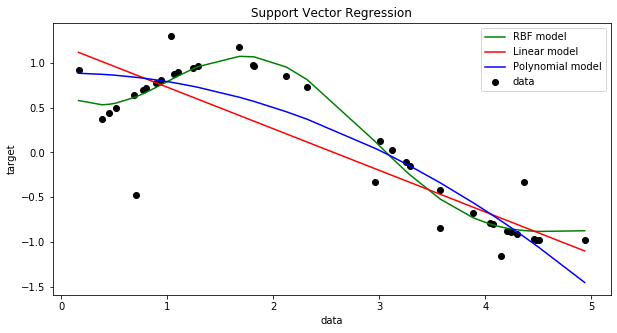

In [62]:
#下記はサンプルデータを使って、デモ表示してみる
# SVR（サポートベクター回帰）
# SVRの中でもカーネルに種類がある
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

# インプットを乱数で生成
X = np.sort(5 * np.random.rand(40, 1), axis=0)
# アウトプットはsin関数
y = np.sin(X).ravel()

# アウトプットにノイズを与える
y[::5] += 3 * (0.5 - np.random.rand(8))

# RBFカーネル、線形、多項式でフィッティング
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# 図を作成
plt.figure(figsize=[10, 5])
plt.scatter(X, y, c='k', label='data')
plt.plot(X, y_rbf, c='g', label='RBF model')
plt.plot(X, y_lin, c='r', label='Linear model')
plt.plot(X, y_poly, c='b', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [27]:
# SVR を使って、今回のモデル学習を行う
# 結果としては内容
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV

#トレーニング・テストデータの設定
score = df["score"].replace("-","0")
train_data, test_data, train_label, test_label = train_test_split(all_dense, score, test_size=0.2, random_state=1)

#データの標準化
sc = StandardScaler()
sc.fit(all_dense)
train_std = sc.transform(train_data)
test_std = sc.transform(test_data)

In [28]:
%%time
# time等で時間を測りながら学習を進める
# ハイパーパラメータ調整
#cpu-4で回して2分ぐらいかかる
params = {'kernel': ['linear'],'gamma': [1e-3, 1e-4],'C': [1, 10, 100]}
svr_clf = RandomizedSearchCV(SVR(),params, cv=5, iid=True,return_train_score=False)
svr_clf.fit(train_std, train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


CPU times: user 2min 35s, sys: 14.8 ms, total: 2min 35s
Wall time: 2min 35s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid=True, n_iter=10, n_jobs=None,
                   param_distributions={'C': [1, 10, 100],
                                        'gamma': [0.001, 0.0001],
                                        'kernel': ['linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [30]:
# 学習の結果を表示
# パラメータチューニングしてもあまり効果がなさそう（データの分布が悪い？）
result_df = pd.DataFrame(svr_clf.cv_results_)
result_df.sort_values(
    by="rank_test_score", inplace=True)
print(result_df[["rank_test_score", 
                 "params", 
                 "mean_test_score"]])

   rank_test_score                                           params  \
2                1    {'kernel': 'linear', 'gamma': 0.001, 'C': 10}   
3                1   {'kernel': 'linear', 'gamma': 0.0001, 'C': 10}   
4                3   {'kernel': 'linear', 'gamma': 0.001, 'C': 100}   
5                3  {'kernel': 'linear', 'gamma': 0.0001, 'C': 100}   
0                5     {'kernel': 'linear', 'gamma': 0.001, 'C': 1}   
1                5    {'kernel': 'linear', 'gamma': 0.0001, 'C': 1}   

   mean_test_score  
2         0.004491  
3         0.004491  
4         0.004419  
5         0.004419  
0         0.004397  
1         0.004397  


In [84]:
#スコアの表示(寄与率としてめちゃくちゃ低い)
score = svr_clf.score(test_std, test_label)
print("{:.3g}".format(score))

0.00915


In [32]:
#他のモデルも簡易に実施できるの例として
#SGD Regressorの場合
sgd_clf = SGDRegressor(max_iter=1000)
sgd_clf.fit(train_std, train_label)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [33]:
#スコアの表示
score = sgd_clf.score(test_std, test_label)
print("{:.3g}".format(score))

0.035


### XGBoostを使ってみよう

In [40]:
#xgboostのinstall
!pip install xgboost

     |████████████████████████████████| 157.5MB 345kB/s  eta 0:00:01     |████████████████████████▏       | 119.1MB 79.8MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [57]:
%%time
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# 学習データからXGBoost用のデータを生成
# モデルのインスタンス作成
XG_clf = xgb.XGBRegressor()
clf_cv = GridSearchCV(XG_clf, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)
clf_cv.fit(train_std, train_label)
print(clf_cv.best_params_, clf_cv.best_score_)

# 改めて最適パラメータで学習
XG_clf = xgb.XGBRegressor(**clf_cv.best_params_)
XG_clf.fit(train_std, train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'max_depth': 2, 'n_estimators': 50} -0.026865997760877315
CPU times: user 15.2 s, sys: 78.6 ms, total: 15.3 s
Wall time: 5.11 s


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    5.0s finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [86]:
# テストデータに対して予測結果をRMSEで出力する
pred = XG_clf.predict(test_std)
rmse = np.sqrt(mean_squared_error(test_label, pred))
print("予測したモデルのrmse: " + str(rmse))

予測したモデルのrmse: 1.0831737794491845


### データと突き合わせして、推論結果を確認してみる

In [79]:
#test用のデータ
test_review =["本当にこの映画は最高だった。また見たい",
              "内容としては微妙だったし、キャストも最低だったので評価は低い。もう見ることはないだろう"]

In [80]:
# 形態素解析に少し時間かかる(数分)
from tqdm import tqdm_notebook as tqdm
test_wakati_list=[]
for lines in tqdm(test_review):
    test_wakati_list.append(wakati_by_sudachi(lines).split(" "))

In [81]:
test_bow_corpus = [dic.doc2bow(d) for d in test_wakati_list]
test_tfidf_corpus = tfidf_model[test_bow_corpus]
test_lsi_corpus = lsi_model[test_tfidf_corpus]

dime = 10
test_dense = list(matutils.corpus2dense(test_lsi_corpus, num_terms=dime).T)
test_txt = sc.transform(test_dense)

In [82]:
#SVRモデルの推論結果
result = svr_clf.predict(test_txt)
print(result)

[3.38462645 3.20356791]


In [85]:
#SGD Regressorモデルの推論結果
result = sgd_clf.predict(test_txt)
print(result)

[3.11728475 2.96472824]


In [83]:
#XGBoostモデルの推論結果
result = XG_clf.predict(test_txt)
print(result)

[3.585752  2.8233123]


### 考察
- 上記の結果を見る限り、本番で利用するには程遠い結果である
- データの分布として3.0前後のデータが圧倒的に多いので、それに引っ張られている可能性は高そう
- このデータのみで考えると、極性に傾斜を付けてあげることは必要かもしれない（より良い悪いを明確にするために）
- 辞書のメンテナンス等は必要なさそうだが、利用する形態素の選定やストップワードの見直しは必要
- 結果が完全に収束できていないので、モデルパラメータも修正必要
- 簡易的な検証ではXGBoostの結果が一番良かった（パラメータチューニングももっと可能）
- 他のモデルとしてはLightGBMあたりは実施が必要